# Data Examination and Cleaning


Tutorial Level : ***Beginner***

Data Cleaning is detection, fillup or removal of incomplete, inaccurate or vague data.
The tutorial below discuss the examination of data and performing necessary steps to clean data including 

* Dealing with Missing Data 
    *     Removal and Filling of Missing Data for Numerical and Categorical Features
* Dividing Numerical and Categorical Data and Converting Categorical Data to Numeric Form
* Inspecting Feature Correlation to study important features
* Removal of less Corrlated Features
* Plotting histogram and kde plots to get a butter understanding of data


Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plots
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

Data being used here for data examination is 'Horse Colic Dataset' which predicts whether a horse can survive or not based on past medical conditions.
Data is available via following links.
1.  [Kaggle](http://www.kaggle.com/uciml/horse-colic)
2. [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Horse+Colic)

Reading data from **CSV file** and saving as **Pandas' Dataframe**

In [2]:
print(os.listdir("../input"))
data = pd.read_csv('../input/horse.csv')
data.head()

['datadict.txt', 'horse.csv']


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


## Shape and Nature of data

In [3]:
print("Shape of data (samples, features): ",data.shape)

Shape of data (samples, features):  (299, 28)


**Inspecting nature of data**, it can be seen that data consists of **17** categorical features and rest numerical out of **28**.

In [4]:
data.dtypes.value_counts()

object     17
float64     7
int64       4
dtype: int64

## Checking missing values for each feature

([<matplotlib.axis.XTick at 0x7fe5310b7940>,
 <a list of 28 Text xticklabel objects>)

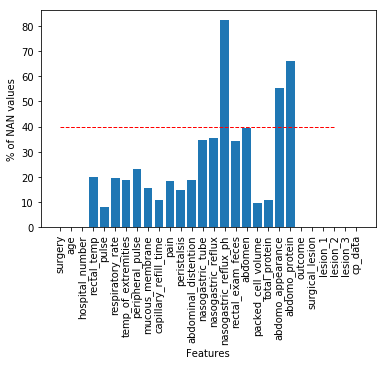

In [5]:
nan_per=data.isna().sum()/len(data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(data.columns))),list(data.columns.values),rotation='vertical')

The graph shows the number of Missing values in each feature, most of the features have less than 40% missing values. 

## Dividing Categorical and Numerical Data

In [6]:
obj_columns=[]
nonobj_columns=[]
for col in data.columns.values:
    if data[col].dtype=='object':
        obj_columns.append(col)
    else:
        nonobj_columns.append(col)
print(len(obj_columns)," Object Columns are \n",obj_columns,'\n')
print(len(nonobj_columns),"Non-object columns are \n",nonobj_columns)

data_obj=data[obj_columns]
data_nonobj=data[nonobj_columns]

17  Object Columns are 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'] 

11 Non-object columns are 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


## Removing and Filling Missing Values in Numerical and Categorical Data 
1.     For columns with more than 40% NAN Value : Remove Columns
2.     For columns with less than 40% NAN Value 
    *       ***For Numerical Data***: Replace NAN values with median value of that particular column
    *      ** *For Categorical Data***: Replace NAN values with mode value of that particular column

In [7]:
print("Data Size Before Numerical NAN Column(>40%) Removal :",data_nonobj.shape)
for col in data_nonobj.columns.values:
    if (pd.isna(data_nonobj[col]).sum())>0:
        if pd.isna(data_nonobj[col]).sum() > (40/100*len(data_nonobj)):
            print(col,"removed")
            data_nonobj=data_nonobj.drop([col], axis=1)
        else:
            data_nonobj[col]=data_nonobj[col].fillna(data_nonobj[col].median())
print("Data Size After Numerical NAN Column(>40%) Removal :",data_nonobj.shape)

Data Size Before Numerical NAN Column(>40%) Removal : (299, 11)
nasogastric_reflux_ph removed
abdomo_protein removed
Data Size After Numerical NAN Column(>40%) Removal : (299, 9)


In [8]:
print("Data Size Before Categorical NAN Column(>40%) Removal :",data_obj.shape)
for col in data_obj.columns.values:
    if (pd.isna(data_obj[col]).sum())>0:
        if pd.isna(data_obj[col]).sum() > (40/100*len(data_nonobj)):
            print(col,"removed")
            data_obj=data_obj.drop([col], axis=1)
        else:
            data_obj[col]=data_obj[col].fillna(data_obj[col].mode()[0])
print("Data Size After Categorical NAN Column(>40%) Removal :",data_obj.shape)

Data Size Before Categorical NAN Column(>40%) Removal : (299, 17)
abdomo_appearance removed
Data Size After Categorical NAN Column(>40%) Removal : (299, 16)


## Converting Categorical Data to Numerical and Merging Them

In [9]:
for col in data_obj.columns.values:
    data_obj[col]=data_obj[col].astype('category').cat.codes
data_merge=pd.concat([data_nonobj,data_obj],axis=1)

target=data['outcome']
print(target.value_counts())
target=data_merge['outcome']
print(target.value_counts())

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64
2    178
0     77
1     44
Name: outcome, dtype: int64


It shall be noted that numeric **0,1,2** are equivalent to **died, euthanized, lived** for outcome.

## Inspecting Correlation between various Features and Outcome

Correlation shows how strongly features are related to each other. We will be checking correlation of each column with outcome. 
* If correlation value is positive, fetaure is positively correlated to outcome. 
1. If correlation value is negative, feature is negatively correlated to outcome. 
1. If correlation value is 0, two columns are not correlated. 

    *  |value| > 0.7 : Hight correlated    
    *  0.7 < |value| > 0.3 : Moderately correlated    
    *  0.3 < |value| > 0 : Weakly correlated    

Correlation of mentioned features wrt outcome in ascending order
outcome                  1.000000
packed_cell_volume       0.398371
pulse                    0.335550
surgical_lesion          0.332933
temp_of_extremities      0.290367
total_protein            0.265889
capillary_refill_time    0.256294
abdomen                  0.214875
rectal_exam_feces        0.193004
surgery                  0.189222
nasogastric_reflux       0.181422
peristalsis              0.165844
peripheral_pulse         0.165719
pain                     0.161964
abdominal_distention     0.112309
hospital_number          0.106396
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
cp_data                  0.078066
respiratory_rate         0.068581
mucous_membrane          0.056852
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.013273
Name: outcome, dtype: float64


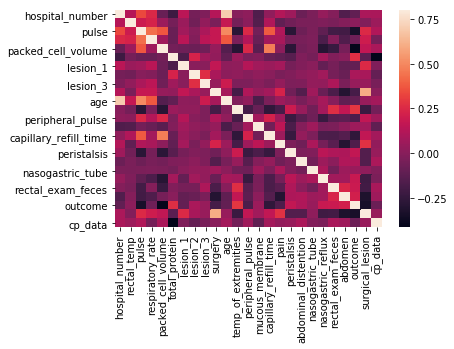

In [10]:
train_corr=data_merge.corr()
sns.heatmap(train_corr, vmax=0.8)
corr_values=train_corr['outcome'].sort_values(ascending=False)
corr_values=abs(corr_values).sort_values(ascending=False)
print("Correlation of mentioned features wrt outcome in ascending order")
print(abs(corr_values).sort_values(ascending=False))

Removing unwanted very less correlated features

In [11]:
print("Data Size Before Correlated Column Removal :",data_merge.shape)

for col in range(len(corr_values)):
        if abs(corr_values[col]) < 0.1:
            data_merge=data_merge.drop([corr_values.index[col]], axis=1)
            print(corr_values.index[col],"removed")
print("Data Size After Correlated Column Removal :",data_merge.shape)

Data Size Before Correlated Column Removal : (299, 25)
lesion_2 removed
cp_data removed
respiratory_rate removed
mucous_membrane removed
nasogastric_tube removed
lesion_3 removed
rectal_temp removed
Data Size After Correlated Column Removal : (299, 18)


To better understand, how two features are correlated. Let us plot two most correlated (to outcome) features as histogram and kde plot.

## 1. Packed Cell Volume & Outcome

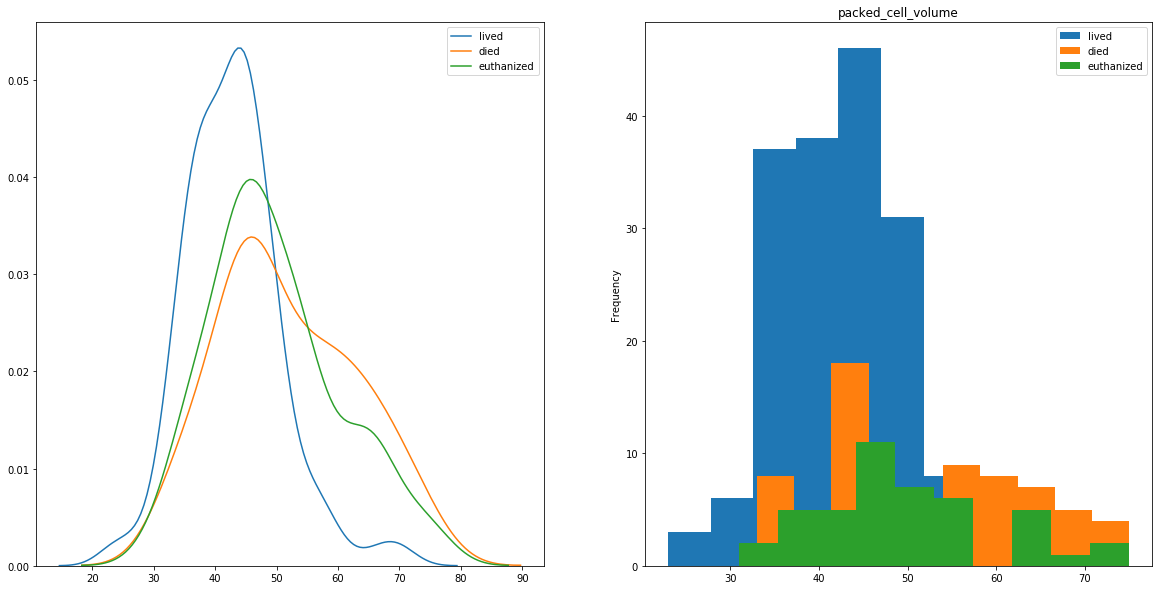

In [12]:
#packed_cell_volume 
col='packed_cell_volume'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[20,10])

y=data_merge[col][target==2]
x=data_merge['outcome'][target==2]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=data_merge[col][target==0]
x=data_merge['outcome'][target==0]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=data_merge[col][target==1]
x=data_merge['outcome'][target==1]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()

The plots show that after approx **50**, outcome is most likely to be **euthanized**, and after **60**, it is likely to be **died**. 

## 2. Pulse & Outcome

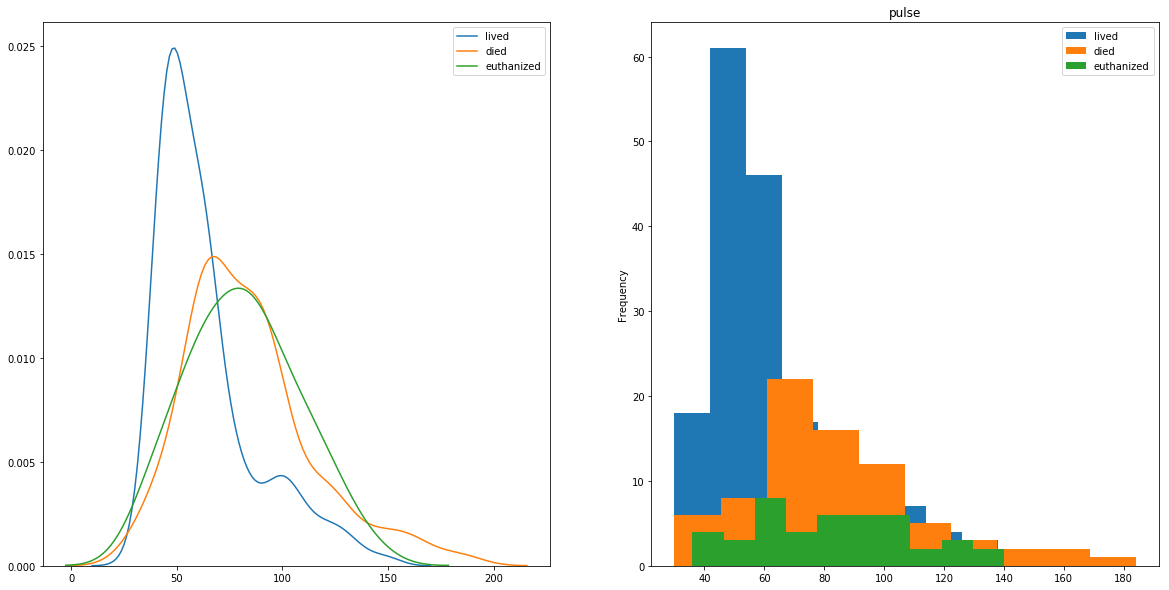

In [13]:
#pulse 
col='pulse'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[20,10])
y=data_merge[col][target==2]
x=data_merge['outcome'][target==2]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)
y=data_merge[col][target==0]
x=data_merge['outcome'][target==0]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)
y=data_merge[col][target==1]
x=data_merge['outcome'][target==1]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)
plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()

The plots show that after approx **60**, outcome is likely to be **died** which is then replaced by **euthanized** after **100**.  And after **150** , the probability of **died** being the outcome is highest.